## Introduction to the Fama-French three-factor model
Before discussing the Fama-French three-factor model and other models, let's look at
a general equation for a three-factor linear model: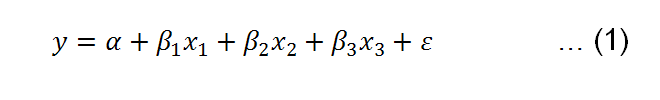

Here, y is the dependent variable, α is the intercept, x1, x2, and x3 are three
independent variables, β1, β2 and β3 are three coefficients, and ε is a random factor.
In other words, we try to use three independent variables to explain one dependent
variable. The same as a one-factor linear model, the graphical presentation of this
three-factor linear model is a straight line, in a four-dimensional space, and the
power of each independent variable is a unit as well. Here, we will use two simple
examples to show how to run multifactor linear regression. For the first example,
we have the following code. The values have no specific meaning and readers could
enter their own values as well:

In [10]:
from pandas.stats.api import ols
import pandas as pd
y = [0.065, 0.0265, -0.0593, -0.001,0.0346]
x1 = [0.055, -0.09, -0.041,0.045,0.022]
x2 = [0.025, 0.10, 0.021,0.145,0.012]
x3= [0.015, -0.08, 0.341,0.245,-0.022]
df=pd.DataFrame({"y":y,"x1":x1, 'x2':x2,'x3':x3})
result=ols(y=df['y'],x=df[['x1','x2','x3']])
print(result)

The pandas DataFrame is used to construct our dataset. Readers should pay
attention to the structure of {"y":y, "x1":x1, 'x2':x2, 'x3':x3}. It has the data
format of a dictionary. The result of running the regression is shown here:
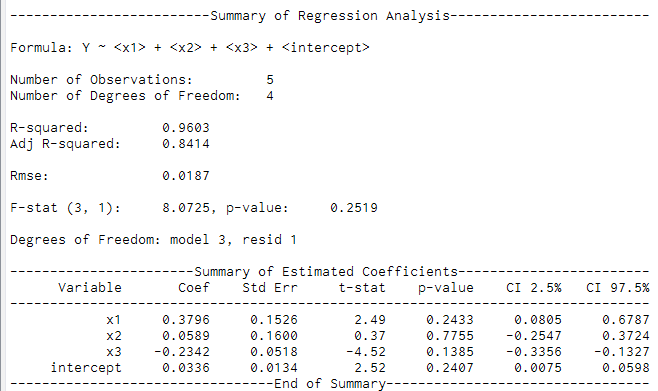

From the output, the three-factor model is listed first: y is against three independent
or explainable variables of x1, x2, and x3. The number of observations is 5, while the
degree of freedom is 4. The value of R2 is 0.96 while the adjusted R2 is 0.84. The R2
value reflects the percentage of variations in y could be explained by x1, x2, and x3.
Since the adjusted R2 considers the impact of the number of independent variables, it
is more meaningful. RMSE stands for Mean Standard Square Error. The smaller this
value, the better our model. The F-stat and the p-value reflect the goodness of our
linear model. The F-value reflects the quality of the whole model. The F-value should
be compared with its critical F-value, which in turn depends on three input variables:
confidence level, degree of freedom for the numerator, and degree of freedom for the
denominator. The scipy.stats.f.ppf() function could be applied to find out the
critical F-value; see the following code:

In [13]:
import scipy.stats as stats
alpha=0.05
dfNumerator=3
dfDenominator=1
f=stats.f.ppf(q=1-alpha, dfn=dfNumerator, dfd=dfDenominator)
print(f)

215.70734536960882


## Fama-French three-factor model
Recall that the CAPM has the following form:

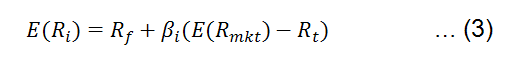

Here, E() is the expectation, E(Ri) is the expected return for stock i, Rf is the risk-free
rate, and E(Rmkt) is the expected market return. For instance, the S&P500 index could
serve as a market index. The slope of the preceding equation ( ) is a measure of the
stock's market risk. To find out the value of , we run a linear regression. The Fama-
French three-factor model could be viewed as a natural extension of CAPM, see here:

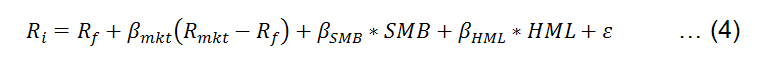

The definitions of Ri, Rf, and Rmkt remain the same. SMB is the portfolio returns of
small stocks minus the portfolio returns of big stocks; HML is the portfolio returns
for high book-to-market value minus returns of low book-to-market value stocks.
The Fama/French factors are constructed using the six value-weight portfolios
formed on size and book-to-market. Small Minus Big (SMB) is the average return
on the three small portfolios minus the average return on the three big portfolios.
Based on the size, measured by the market capitalization (numbers of shares
outstanding times the end of year price), they classify all stocks into two categories,
S (small) and H (high). Similarly, based on the ratio of book value of equity to the
market value of equity, all stocks are classified into three groups of H (high), M
(Median), and L (Low).